# **Загружаем библиотеки и БД**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
df_test = pd.read_csv("test_data.csv")
df_train = pd.read_csv("train_data.csv")
df_target = pd.read_csv("sample_submition.csv")

# **EDA**

Преобразуем стобик **дата публикации** в **возраст игры**

In [ ]:
df_train.dtypes

ID                    float64
Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average         object
BGG Rank                int64
Complexity Average     object
Owned Users           float64
Mechanics              object
Domains                object
dtype: object

In [ ]:
df_test['Year Published'] -= 2024
df_train['Year Published'] -= 2024

df_test['Year Published'] *= -1
df_train['Year Published'] *= -1

Смотрим на пропущенные данные и усердно думаем **'Шо нам делать?'**

In [ ]:
print(df_train.shape)
print(df_train.isnull().sum())

print('\n\n\n')

print(df_test.shape)
print(df_test.isnull().sum())

(15257, 14)
ID                      10
Name                     0
Year Published           1
Min Players              0
Max Players              0
Play Time                0
Min Age                  0
Users Rated              0
Rating Average           0
BGG Rank                 0
Complexity Average       0
Owned Users             17
Mechanics             1200
Domains               7649
dtype: int64




(5086, 13)
ID                       6
Name                     0
Year Published           0
Min Players              0
Max Players              0
Play Time                0
Min Age                  0
Users Rated              0
BGG Rank                 0
Complexity Average       0
Owned Users              6
Mechanics              398
Domains               2510
dtype: int64


**Строим BoxPlot**

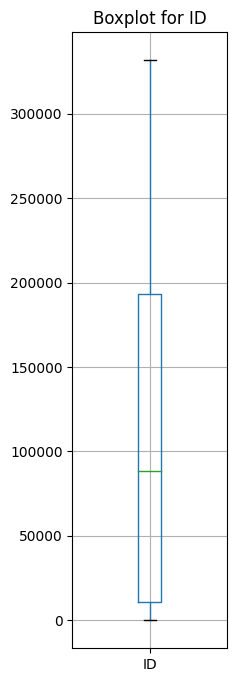

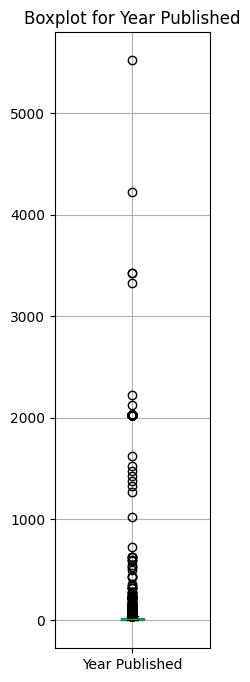

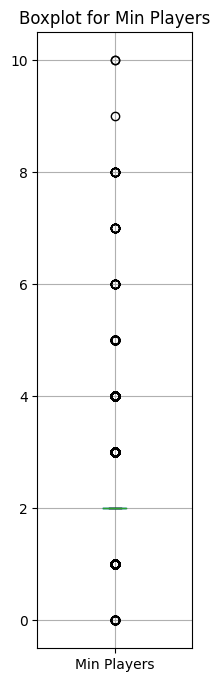

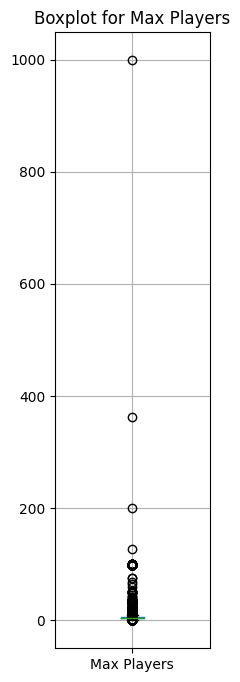

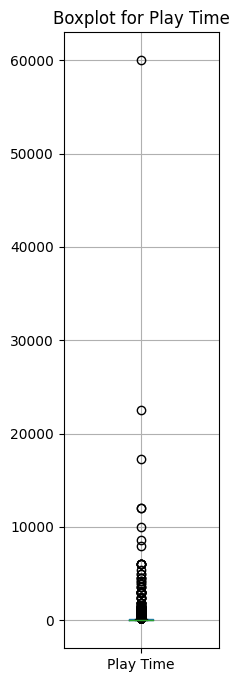

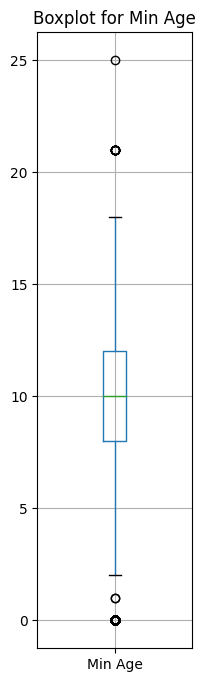

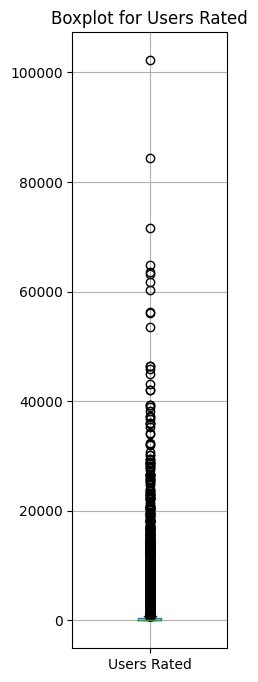

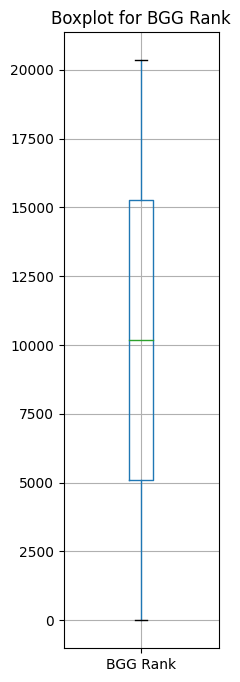

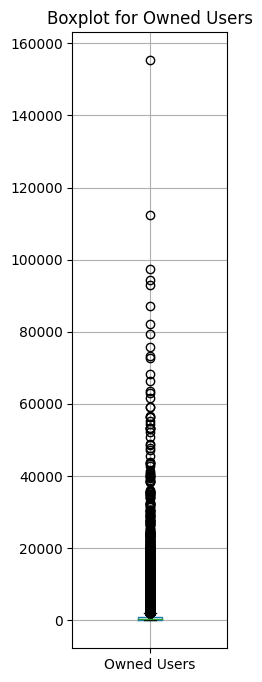

In [ ]:
features = ['ID', 'Year Published', 'Min Players', 'Max Players', 'Play Time', 'Min Age', 'Users Rated', 'BGG Rank', 'Owned Users']

for feature in features:
    df_train.boxplot(column=feature, figsize=(2, 8))
    plt.title(f'Boxplot for {feature}')
    plt.show()

Штука очень долго работает поэтому чилим без этого

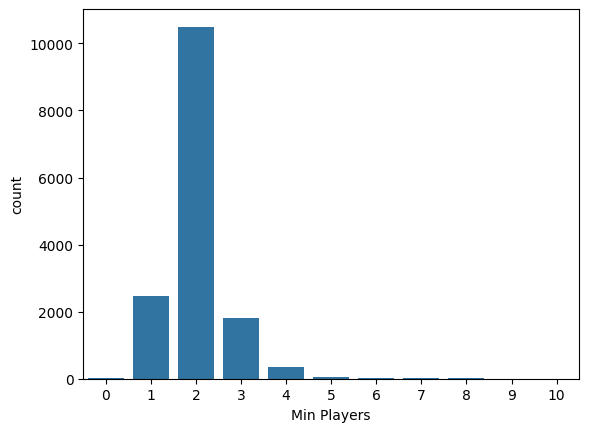

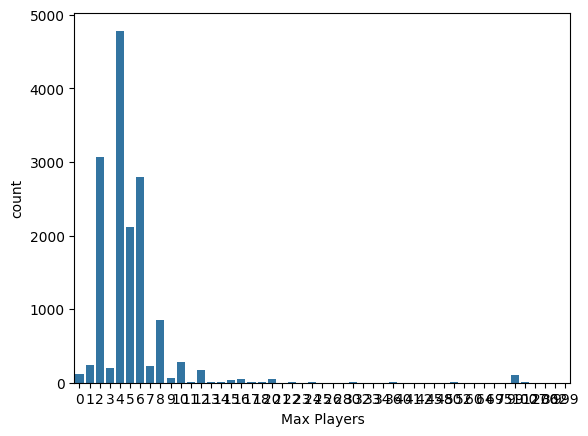

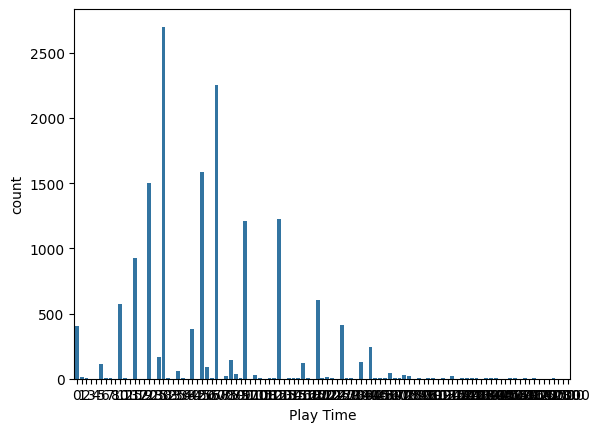

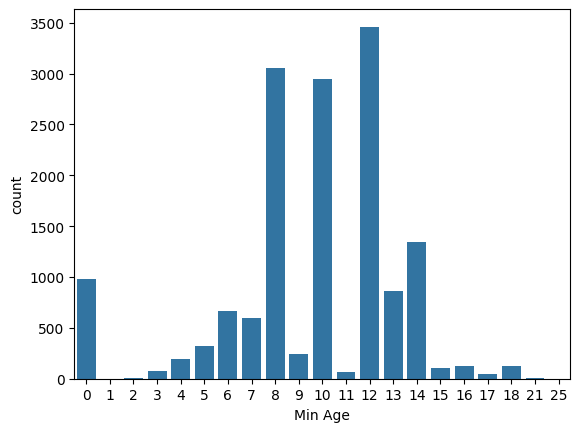

In [ ]:
features = ['Min Players', 'Max Players', 'Play Time', 'Min Age']

for feature in features:
  sns.countplot(x=feature, data=df_train)
  plt.show()

# **Преобразование данных для регрессий**

Создаём стобики с механиками игр и заполняем их 0 и 1

In [ ]:
#str.get dummies sep=','

In [ ]:
df_train['Mechanics'] = df_train['Mechanics'].fillna('')


unique_mechanics = set(','.join(df_train['Mechanics'].astype(str)).split(','))

# Проходим по каждой уникальной механике и создаем новый столбец с ее наличием
for mechanic in unique_mechanics:
    df_train[mechanic] = df_train['Mechanics'].str.contains(mechanic).astype(int)


df_test['Mechanics'] = df_test['Mechanics'].fillna('')


unique_mechanics = set(','.join(df_test['Mechanics'].astype(str)).split(','))

# Проходим по каждой уникальной механике и создаем новый столбец с ее наличием
for mechanic in unique_mechanics:
    df_test[mechanic] = df_test['Mechanics'].str.contains(mechanic).astype(int)

<ipython-input-86-dba3089e7cb2>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[mechanic] = df_train['Mechanics'].str.contains(mechanic).astype(int)
<ipython-input-86-dba3089e7cb2>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[mechanic] = df_train['Mechanics'].str.contains(mechanic).astype(int)
<ipython-input-86-dba3089e7cb2>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

In [ ]:
df_train['Domains'] = df_train['Domains'].fillna('')


unique_mechanics = set(','.join(df_train['Domains'].astype(str)).split(','))

# Проходим по каждой уникальной механике и создаем новый столбец с ее наличием
for mechanic in unique_mechanics:
    df_train[mechanic] = df_train['Domains'].str.contains(mechanic).astype(int)


df_test['Domains'] = df_test['Domains'].fillna('')


unique_mechanics = set(','.join(df_test['Domains'].astype(str)).split(','))

# Проходим по каждой уникальной механике и создаем новый столбец с ее наличием
for mechanic in unique_mechanics:
    df_test[mechanic] = df_test['Domains'].str.contains(mechanic).astype(int)

Преобразуем непонятный столбик с запятой в столбик с точкой

In [ ]:
columns_to_replace = ['Rating Average', 'Complexity Average']

for column in columns_to_replace:
    df_train[column] = df_train[column].str.replace(',', '.')
    df_test[column] = df_train[column].str.replace(',', '.')


df_train['Rating Average'] = pd.to_numeric(df_train['Rating Average'])
df_test['Rating Average'] = pd.to_numeric(df_test['Rating Average'])

df_train['Complexity Average'] = pd.to_numeric(df_train['Complexity Average'])
df_test['Complexity Average'] = pd.to_numeric(df_test['Complexity Average'])

<ipython-input-87-cae66266c909>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[column] = df_train[column].str.replace(',', '.')


Выкидываем столбики

In [ ]:
df_train.drop(columns=['Mechanics', 'Domains', 'Name', ''], inplace=True)

df_test.drop(columns=['Mechanics', 'Domains', 'Name', ''], inplace=True)

In [ ]:
column_names_train = df_train.columns.tolist()[1:]

for column in column_names_train:
    mode_value = df_train[column].mode()[0]  # Получение модального значения колонки
    df_train[column].fillna(mode_value, inplace=True)

In [ ]:
column_names_test = df_test.columns.tolist()[1:]

for column in column_names_test:
    mode_value = df_test[column].mode()[0]  # Получение модального значения колонки
    df_test[column].fillna(mode_value, inplace=True)

# **Линейная регрессия**

In [ ]:
target_train = ['Rating Average']
column_names_train = df_train.columns.tolist()[1:7] + df_train.columns.tolist()[8:]

X_train, X_test, Y_train, Y_test = train_test_split(df_train[column_names_train], df_train[target_train], test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
y_pred =  np.round(y_pred, 2)

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R^2:", r2)

MAE: 0.3998973350808213
MSE: 0.31602313237221497
R^2: 0.6437557542425124


In [ ]:
target_train = ['Rating Average']
column_names_train = df_train.columns.tolist()[1:7] + df_train.columns.tolist()[8:]

X_train = df_train[column_names_train]
Y_train = df_train[target_train]

model = LinearRegression()

model.fit(X_train, Y_train)

existing_columns_test = [col for col in column_names_train if col in df_test.columns]

for col in column_names_train:
    if col not in df_test.columns:
        df_test[col] = 0

X = df_test[column_names_train]

y_pred = model.predict(X)
y_pred =  np.round(y_pred, 2)

y_pred = y_pred.ravel()

results_df = pd.DataFrame({'index': df_target['index'], 'Rating Average': y_pred})

results_df.to_csv('predictions_lin_reg.csv', index=False)

<ipython-input-92-ffe5de0ce53f>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[col] = 0
<ipython-input-92-ffe5de0ce53f>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[col] = 0
<ipython-input-92-ffe5de0ce53f>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[col] = 0
<ipy

# **Случайный лес**

In [ ]:
target_train = ['Rating Average']
column_names_train = df_train.columns.tolist()[1:7] + df_train.columns.tolist()[8:]

X_train = df_train[column_names_train]
Y_train = df_train[target_train]


# Дерево решений
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Y_train)

X = df_test[column_names_train]

y_pred_dt = dt.predict(X_train)

results_df = pd.DataFrame({'index': df_target['index'], 'Rating Average': y_pred_dt})

results_df.to_csv('predictions_ran_for.csv', index=False)

ValueError: array length 15257 does not match index length 5086

# **Метод ближайших соседей** НЕ РАБОТАЕТ

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

X = df_train[df_train.columns.tolist()[1:7] + df_train.columns.tolist()[8:]]
y = df_train['Rating Average']

# Разделение данных на тренировочные и тестовые
X_train_data, X_test, y_train_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train_data, y_train_data)


y_pred_knn = knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'MSE: {mse_knn}')
print(f'MAE: {mae_knn}')
print(f'R2: {r2_knn}')

MSE: 0.11424993088548493
MAE: 0.211014498689384
R2: 0.8743736415081499


In [ ]:
X = df_train[df_train.columns.tolist()[1:7] + df_train.columns.tolist()[8:]]
y = df_train['Rating Average']

knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X, y)

X = df_test[column_names_train]

y_pred_knn = knn.predict(X)

results_df = pd.DataFrame({'index': df_target['index'], 'Rating Average': y_pred_knn})

results_df.to_csv('predictions_AAAAA.csv', index=False)

# **Эксперименты**